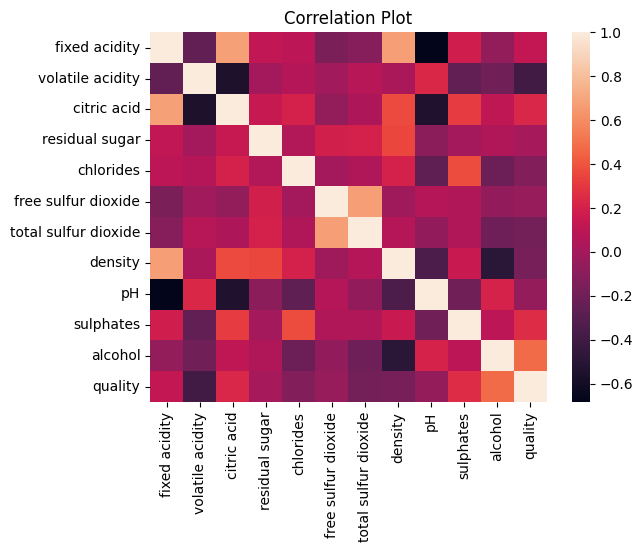

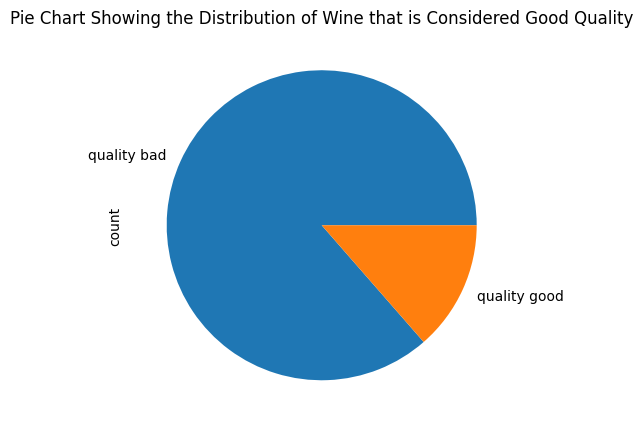

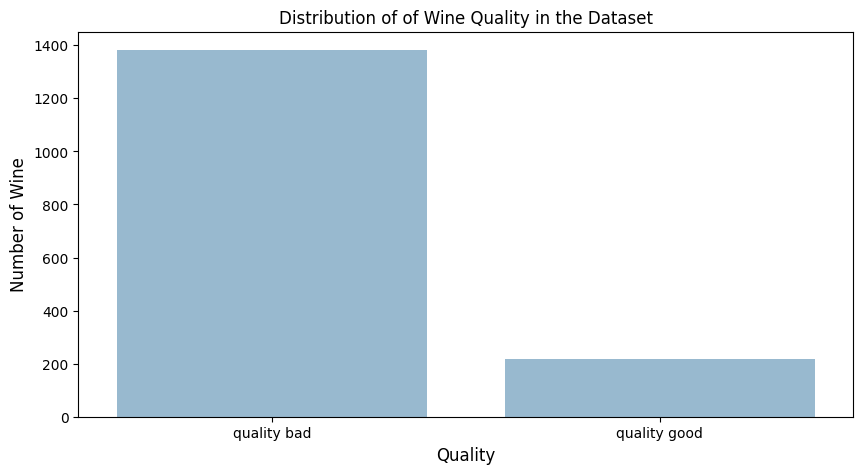

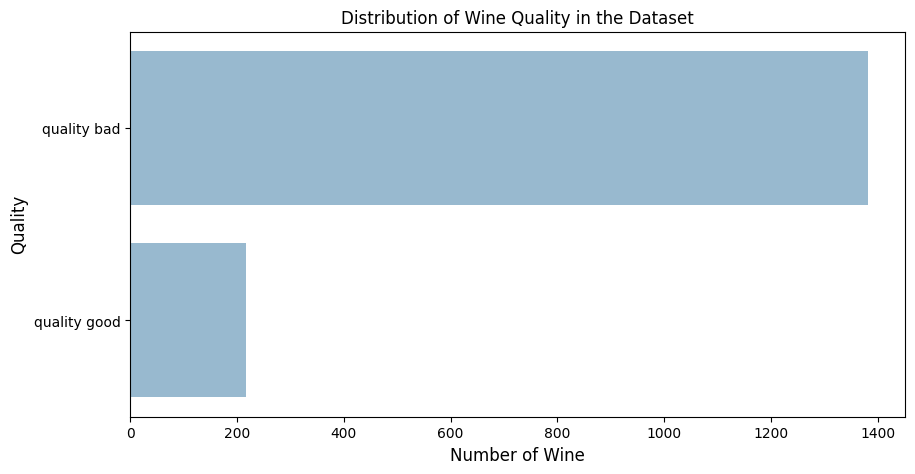

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#04/18/2024
#Alvin Liu
#CIS 3120 Project 2 Question 2: Wine Prediction Regression Model


#Importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle

#The function below will take the arguement of wine quality dataframe and the column name that we want encoded and make it permanent.
def encoding(df,column_name):
    encoded_column = pd.get_dummies(df[column_name], dtype='int') #Use the pd.getdummies method to convert categorical variables into a set of binary columns (0 or 1) to represent the presence or absence of a category. dtype means make the 0 and 1 into integer.
    df.drop(column_name, axis=1, inplace=True) #Dropping the column from the orginal dataframe and use inplace=True to make it permanent.
    df = df.join(encoded_column) #Merge the orginal dataframe with the encoded version
    return df #Return the new dataframe with the encoded values.


#The function below will take the arguement of the wine quality dataframe and output a heatmap of all the column correlations
def create_heatmap(df):
    sns.heatmap(df.corr()) #Use sns library to create a heatmap and and corr() is to show the correlation.
    plt.title('Correlation Plot') #Title of the graph.
    plt.show() #Showing the graph.

#The function below would take the parameter df, column name, and pie chart name and output it using matplotlib.
def make_pie_chart(df, column_name, pie_chart_name):
    count = df[column_name].value_counts() #Getting the value count of that column
    plt.figure(figsize=(5,10)) #Size of the figure
    count.plot.pie( title = pie_chart_name) #Makeing the chart and giving it the pie_chart_name title
    plt.show() #Showing the graph

#The function below would take in the parameter df, column_name, barplot_title_name, ylabel, xlabel to find the
#different values of that columns and how many wine quality would have that value and output it as a barplot.
def barplot(df, column_name, barplot_title_name, ylabel, xlabel):
    count  = df[column_name].value_counts() #Value_counts() would get all the different values of that column and how many are there
    plt.figure(figsize=(10,5)) #Size of the graph
    sns.barplot(x = count.index, y= count.values,  alpha=0.5) #.values get counts of unique values on the y-axis and .index get the unique values themselves on the x-axis.
    plt.title(barplot_title_name) #The barplot's graph name
    plt.ylabel(ylabel, fontsize=12) #The y-axis name and the font size
    plt.xlabel(xlabel, fontsize=12) #The x-axis name and the font size
    plt.show() #Showing the graph

#The function below would take in the parameter df, column_name, barplot_title_name, ylabel, xlabel to find the
#different values of that columns and how many wine quality would have that value and output it as a horizontal barplot.
def hbarplot(df, column_name, barplot_title_name, ylabel, xlabel):
    count  = df[column_name].value_counts() #Value_counts() would get all the different values of that column and how many are there
    plt.figure(figsize=(10,5)) #Size of the graph
    sns.barplot(x = count.values, y= count.index,  alpha=0.5, orient='h') #.values get counts of unique values on the x-axis and .index get the unique values themselves on the y-axis. Switched because the plot is horizontal.
    plt.title(barplot_title_name) #The barplot's graph name
    plt.ylabel(ylabel, fontsize=12) #The y-axis name and the font size
    plt.xlabel(xlabel, fontsize=12) #The x-axis name and the font size
    plt.show() #Showing the graph

#The function below would take the arguement of our dataset that we splitted into features (x) and target (y) and train a linear regression model which
#will output the coefficents, intercept, R-Squared, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and Exporting the model as a pickle
def statistical_analysis(X, y):
    #The code below would be splitting the dataset into training and test sets in the ratio 70/30
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=2)

    from sklearn.linear_model import LinearRegression
    #Loading the Linear Regression Model
    LR = LinearRegression()
    LR.fit(X_train, y_train)

    #Model Evaluation
    #testing our model on our training data
    y_pred = LR.predict(X_test)

    #Calculating the coefficients
    coefficients = LR.coef_
    print(f'Coefficients {coefficients}\n') #Printing it out

    #Calculating the intercept
    intercept = LR.intercept_
    print(f'Intercept: {intercept}\n') #Printing it out

    #Calculating R-Squared
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred) #Using the test and prediction
    print(f'R2: {r2}\n') #Printing it out

    #Calculating Mean Squared Error
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse}\n') #Printing it out

    #Calculating Root Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False) #Put the squared to not square it, so it don't give us the same value.
    print(f'RMSE: {rmse}\n') #Printing it out

    #Calculating Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE {mae}\n') #Printing it out

    #Exporting the model as a pickle
    with open('wine_alcohol_prediction_model.pk1', 'wb') as f:
        pickle.dump(LR, f)

#The main function will act as as a way to call our functions.
def main():
    #Making a panda dataframe from the csv file of the datasets that we will be using to train our model
    wine_alcohol_prediction_df = pd.read_csv('https://raw.githubusercontent.com/alvliu03/Wine_Quality_Prediction/main/winequality-red.csv')

    #Creating a correlation with all the float and int values. Object (string) values can't be used.
    create_heatmap(wine_alcohol_prediction_df)

    #The code below will reclassify the wine as good or bad instead of using a number scale.
    bins = (1, 6.5, 10) #Defines the bin edges. Values less than or equal to 6.5 will be in the 'quality_bad' bin, and values greater than 6.5 and up to 10 will be in the 'quality_good' bin.
    group_names = ['quality bad', 'quality good'] #Names that we will be assigning
    wine_alcohol_prediction_df['quality'] = pd.cut(wine_alcohol_prediction_df['quality'], bins = bins, labels = group_names).astype(str) #Applies the binning to the 'quality' column. The pd.cut function is used to bin the 'quality' values based on the specified bins and assigns the corresponding labels from group_names and convert it into a string.

    #The make_pie_chart will make a pie chart showing which quality does this dataset compose the most out of.
    make_pie_chart(wine_alcohol_prediction_df, 'quality', 'Pie Chart Showing the Distribution of Wine that is Considered Good Quality')

    #The barplot function would get the distrubtion of quality in the dataset.
    barplot(wine_alcohol_prediction_df, 'quality', 'Distribution of of Wine Quality in the Dataset', 'Number of Wine', 'Quality')

    # #The hbarplot function would get the distrubtion of quality horizontally.
    hbarplot(wine_alcohol_prediction_df, 'quality', 'Distribution of Wine Quality in the Dataset', 'Quality', 'Number of Wine')

    #The encoding function would turn the quality column into quality bad and quality good. 1 means it have quality bad and quality good. 0 mean it don't have them.
    wine_alcohol_prediction_df = encoding(wine_alcohol_prediction_df, 'quality')


    print(wine_alcohol_prediction_df)
    wine_alcohol_prediction_df.info()
    #wine_quality_prediction_df.info()

    x = wine_alcohol_prediction_df.drop(['alcohol'], axis=1) #Dropping the alcohol column because we just want the factors that matter when determining the alcohol content of the wine.
    y = wine_alcohol_prediction_df['alcohol'] ##Making the y just the alcohol content because that is what we are trying to find to see can we predict the alcohol content by using other factors.

    #Training our model and outputting the coefficents, intercept, R-Squared, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, and Exporting the model as a pickle
    statistical_analysis(x, y)

main()